In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
# from tensorflow.examples.tutorials.mnist import input_data

## Configuration options

In [ ]:
feature_vector_length = 784
num_classes = 10

## Load the data

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()#mnist.load_data()

print(len(X_train))
print(X_test.shape)
print(Y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
60000
(10000, 28, 28)
(60000,)


## Convert into greyscale

In [ ]:
print('Original matrix', X_train[1])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('Normalised matrix', X_train[1])

Original matrix [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 16

Reshape the data - MLPs do not understand such things as '2D'.
Reshape to 28 x 28 pixels = 784 features

In [ ]:
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)
print(X_train.shape)

(60000, 784)


## Convert target classes to categorical ones

In [ ]:
print(Y_test[0])
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)
print(Y_test[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Set the input shape

In [ ]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


## Create the model

In [ ]:
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

### Configure the model and start training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='MeanSquaredError', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 350)               274750    
                                                                 
 dense_1 (Dense)             (None, 50)                17550     
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 292810 (1.12 MB)
Trainable params: 292810 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)


Epoch 1/10
192/192 [==============================] - 4s 14ms/step - loss: 0.3730 - accuracy: 0.8979 - val_loss: 0.1830 - val_accuracy: 0.9453
Epoch 2/10
192/192 [==============================] - 2s 13ms/step - loss: 0.1403 - accuracy: 0.9596 - val_loss: 0.1348 - val_accuracy: 0.9601
Epoch 3/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0945 - accuracy: 0.9729 - val_loss: 0.1001 - val_accuracy: 0.9720
Epoch 4/10
192/192 [==============================] - 3s 18ms/step - loss: 0.0688 - accuracy: 0.9799 - val_loss: 0.0916 - val_accuracy: 0.9730
Epoch 5/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.0855 - val_accuracy: 0.9756
Epoch 6/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0381 - accuracy: 0.9891 - val_loss: 0.0850 - val_accuracy: 0.9753
Epoch 7/10
192/192 [==============================] - 2s 13ms/step - loss: 0.0294 - accuracy: 0.9920 - val_loss: 0.0880 - val_accuracy: 0.9739

## Test the model after training

In [ ]:
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9773
Test results - Loss: 0.07671204954385757 - Accuracy: 97.72999882698059%


## Predict Individual Sample

In [ ]:
temp = tf.keras.datasets.mnist.load_data()#input_data.read_data_sets('MNIST_data')
mnist1 = {
          'train': {
                    'images':temp[0][0],
                    'labels':temp[0][1]
                   },
           'test': {
                    'images':temp[1][0],
                    'labels':temp[1][1]
                 }
         }


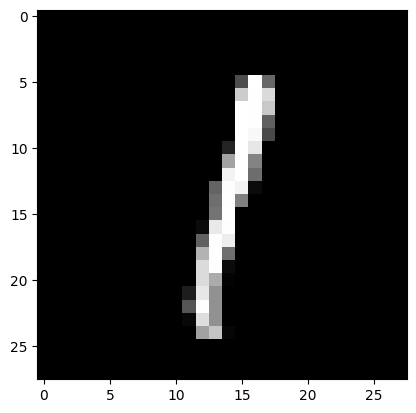

In [ ]:
first_image = mnist1['test']['images'][57]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
pred = model.predict(mnist1['test']['images'][57].reshape(1,feature_vector_length), verbose=1)
print(pred)
print(np.argmax(pred))

1/1 [==============================] - 0s 163ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1
